In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

# Set display options for clarity
pd.set_option('display.max_columns', None)
print('Environment setup complete.')

Environment setup complete.


In [10]:
df = pd.read_csv('cleaned_ebay_deals.csv')

<Axes: title={'center': 'Number of Deals per Hour'}, xlabel='hour'>

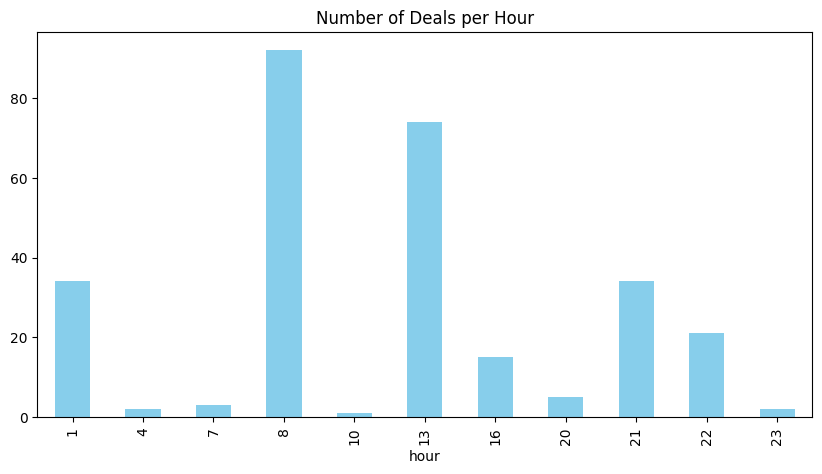

In [11]:
df_filled = df.copy()
df_filled['timestamp'] = pd.to_datetime(df_filled['timestamp'])
df_filled = df_filled.sort_values('timestamp')
df_filled['hour'] = df_filled['timestamp'].dt.hour
deals_per_hour = df_filled.groupby('hour').size()
deals_per_hour.plot(kind='bar', figsize=(10,5), color='skyblue', title='Number of Deals per Hour')



<Axes: xlabel='original price', ylabel='price'>

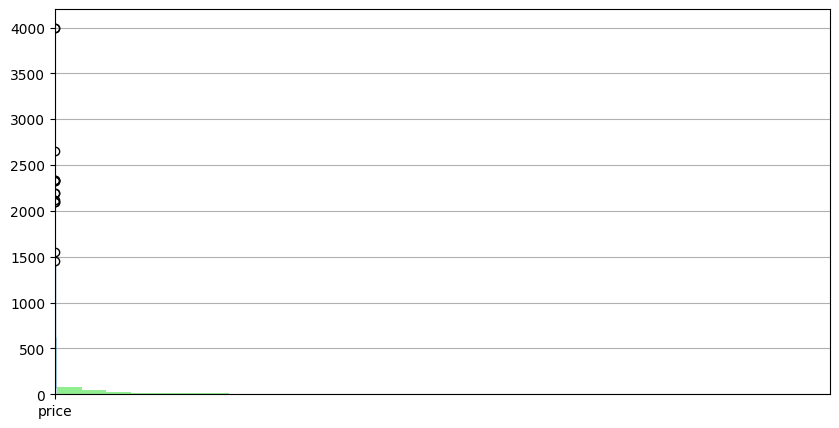

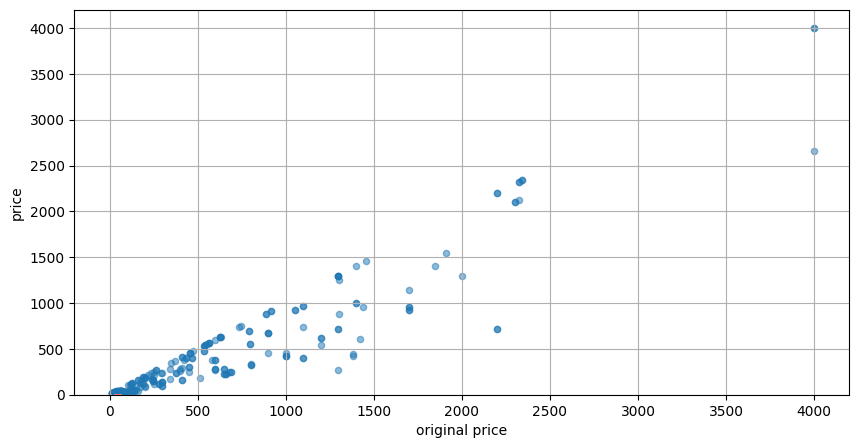

In [12]:
df_filled['price'].hist(bins=30, color='lightgreen', figsize=(10,5))
df_filled.boxplot(column='price', figsize=(6,4))
df_filled.plot.scatter(x='original price', y='price', alpha=0.5, figsize=(7,5))
df_filled['discount_percentage'].hist(bins=30, color='salmon', figsize=(10,5))


<Axes: title={'center': 'Frequency of Shipping Options'}, xlabel='shipping'>

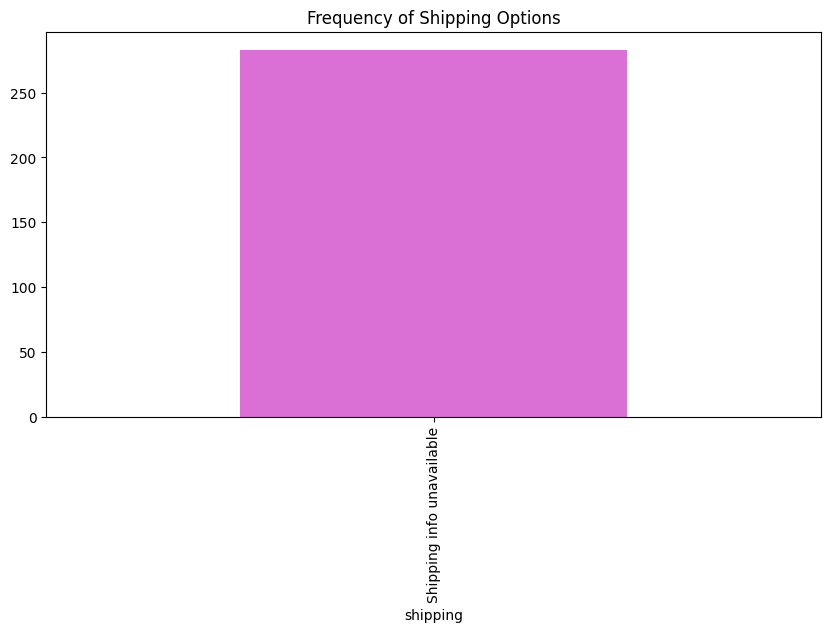

In [13]:
shipping_counts = df_filled['shipping'].value_counts()
shipping_counts.plot(kind='bar', figsize=(10,5), color='orchid', title='Frequency of Shipping Options')


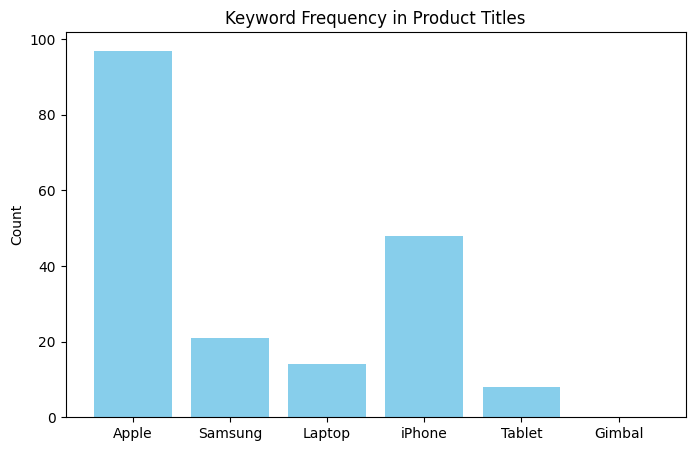

In [14]:
keywords = ["Apple", "Samsung", "Laptop", "iPhone", "Tablet", "Gimbal"]
keyword_counts = {kw: df_filled['title'].str.contains(kw, case=False, na=False).sum() for kw in keywords}
plt.figure(figsize=(8,5))
plt.bar(keyword_counts.keys(), keyword_counts.values(), color='skyblue')
plt.title("Keyword Frequency in Product Titles")
plt.ylabel("Count")
plt.show()

<Axes: >

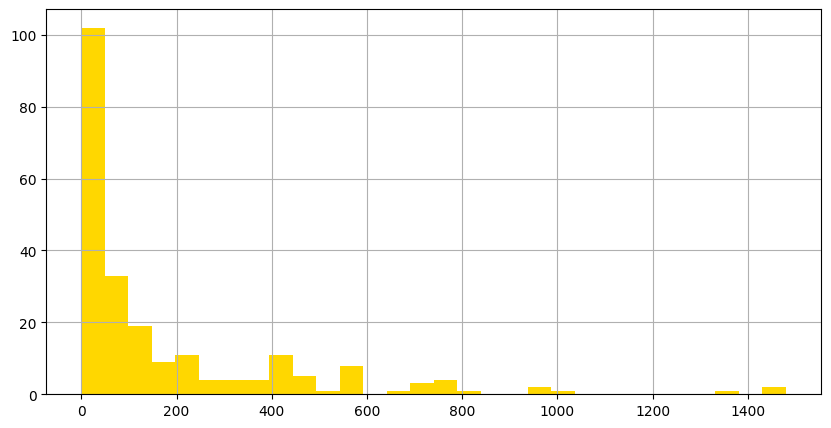

In [15]:
df_filled['price_difference'] = df_filled['original price'] - df_filled['price']
df_filled['price_difference'].hist(bins=30, color='gold', figsize=(10,5))


In [16]:
top_discounts = df_filled.sort_values('discount_percentage', ascending=False)
display(top_discounts.head(5))


,timestamp,title,price,original price,shipping,item url,discount_percentage,hour,price_difference
219,2025-11-02 16:16:13,Samsung Galaxy S22 Ultra 128GB S908U Unlocked ...,265.99,1299.00,Shipping info unavailable,https://www.ebay.com/itm/256363270963?_trkparm...,79.52,16,1033.01
134,2025-11-02 07:36:37,"Dell Touchscreen Chromebook 3100 11"" Celeron 1...",38.13,160.00,Shipping info unavailable,https://www.ebay.com/itm/144965228566?_trkparm...,76.17,7,121.87
100,2025-11-01 21:41:45,"Acer Portable Monitor 15.6"" Full HD IPS 1920x1...",38.63,139.99,Shipping info unavailable,https://www.ebay.com/itm/256905415945?_trkparm...,72.41,21,101.36
103,2025-11-01 21:41:45,"Acer 15.6i"" Portable Monitor FullHD 1920x1080 ...",40.47,139.99,Shipping info unavailable,https://www.ebay.com/itm/267229717756?_trkparm...,71.09,21,99.52
131,2025-11-02 04:17:56,Samsung Galaxy S23 Ultra 512GB S918U Unlocked ...,418.99,1379.99,Shipping info unavailable,https://www.ebay.com/itm/256613651818?_trkparm...,69.64,4,961.00
